In [16]:
from signalTeste import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
#import wave
import time
import pickle
import peakutils
%matplotlib inline 

In [17]:
signal = signalMeu()

In [78]:
fs = 48000
time, sinal = signal.generateSin(500,1,2,fs)
time, sinal1 = signal.generateSin(520,1,2,fs)
time, sinal2 = signal.generateSin(100,2,2,fs)
sinalF = np.add(sinal, sinal1)
sinalF = np.add(sinalF, sinal2)/3
myrecording = sd.playrec(sinalF, fs, channels=1)

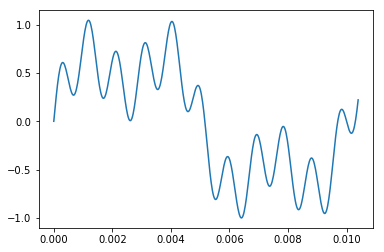

In [73]:
plt.plot(time[:500], sinalF[:500])
plt.show()

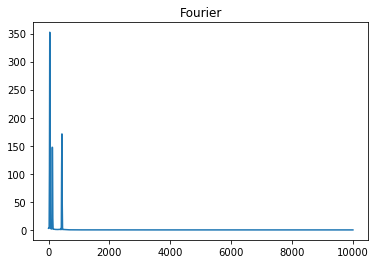

In [74]:
signal.plotFFT(sinalF[:2000],20000)

In [84]:
def geraNum(number = 1, amplitude=1, duration = 1, fs=48000):
    listaFreq = [[941,1336], [697,1209],
                 [697,1336], [697,1477],
                 [770,1209], [770,1336],
                 [770,1477], [852,1209],
                 [852,1336], [852,1477] ]
    print(listaFreq[number])
    time, sinal = signal.generateSin(listaFreq[number][0],amplitude,duration,fs)
    time, sinal1 = signal.generateSin(listaFreq[number][1],amplitude,duration,fs)
    sinalF = np.add(sinal, sinal1)/2
    
    return time,sinalF

[852, 1209]


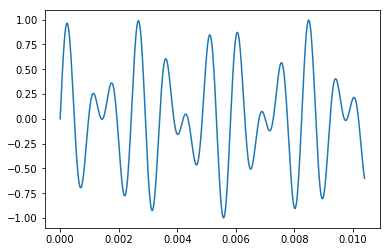

In [90]:
tempo, sinalao = geraNum(number=7)
myrecording = sd.playrec(sinalao, fs, channels=1)
plt.plot(tempo[:500], sinalao[:500])
plt.show()